# CIS 545 Homework 2: Graphs

In [1]:
# Execute this once, the first time you run
# !pip install networkx

# Disable Python warning messages - you should probably only run this before submission

# import warnings
# warnings.filterwarnings('ignore')

## Step 2.1 Spark Setup

In [1]:
# TODO: Connect to Spark as per Step 2.1
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

spark = SparkSession.builder.appName('Graphs-HW2').getOrCreate()

In [2]:
# Load some dummy data, which should be overwritten in Step 2.2

answers_sdf = spark.createDataFrame([{'from_node': 123, 'to_node': 456},\
                                    {'from_node': 456, 'to_node': 789},
                                    {'from_node': 456, 'to_node': 890}])
comments_answers_sdf = spark.createDataFrame([{'from_node': 123, 'to_node': 456}])
comments_questions_sdf = spark.createDataFrame([{'from_node': 123, 'to_node': 456}])

graph_sdf = spark.createDataFrame([{'from_node': 123, 'to_node': 456}])

/usr/local/spark/python/pyspark/sql/session.py:331: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


## Step 2.2 Loading

In [2]:
# TODO: load data as per Step 2.2
answers_sdf = spark.read.load('sx-stackoverflow-a2q.txt', format="text")
comments_answers_sdf = spark.read.load('sx-stackoverflow-c2a.txt', format="text")
comments_questions_sdf = spark.read.load('sx-stackoverflow-c2q.txt', format="text")



In [69]:
# You may add as many cells as you like here.
# Use Insert | Insert Cell Below

## Step 2.2 Results

In [3]:
answers_sdf.count()

17823525

In [4]:
answers_sdf.show()

+----------------+
|           value|
+----------------+
|  9 8 1217567877|
|  1 1 1217573801|
| 13 1 1217606247|
| 17 1 1217617639|
| 48 2 1217618182|
| 17 1 1217618239|
| 19 9 1217618357|
|13 23 1217618560|
|13 11 1217618799|
|23 23 1217619360|
|35 33 1217620542|
|39 33 1217620597|
|43 22 1217620971|
|17 32 1217621272|
|39 40 1217621416|
|37 40 1217621670|
|45 45 1217621917|
|17 17 1217622124|
|49 13 1217623079|
|13 23 1217623216|
+----------------+
only showing top 20 rows



In [5]:
answers_sdf.printSchema()

root
 |-- value: string (nullable = true)



In [6]:
comments_answers_sdf.count()

25405374

In [7]:
comments_answers_sdf.show(10)

+--------------------+
|               value|
+--------------------+
|     1 91 1220713630|
|     3 91 1220713792|
|  380 350 1220715736|
|4642 2257 1220734307|
|4642 1324220 1220...|
|2495 4285 1220736640|
|4642 4893 1220737355|
|2515 4903 1220738560|
|2515 4893 1220739071|
|  199 199 1220741079|
+--------------------+
only showing top 10 rows



In [8]:
comments_answers_sdf.printSchema()

root
 |-- value: string (nullable = true)



In [9]:
comments_questions_sdf.count()

20268151

In [10]:
comments_questions_sdf.show(10)

+--------------------+
|               value|
+--------------------+
|4550 4550 1220729190|
|  242 184 1220733503|
|4213 4946 1220768149|
|    91 91 1220768295|
|2658 1874 1220771891|
|4035 1874 1220773037|
|2257 4489 1220802041|
|  577 577 1220834891|
|4489 4489 1220853536|
| 828 2783 1220854143|
+--------------------+
only showing top 10 rows



In [11]:
comments_questions_sdf.printSchema()

root
 |-- value: string (nullable = true)



## Step 2.3

In [3]:
# TODO: wrangling work in Step 2.3.  Add as many Cells as you need
answers_sdf.createOrReplaceTempView('my_sdf_view')
answers_sdf = spark.sql("SELECT CAST(split(value, ' ')[0] AS INT) AS from_node, "\
              "CAST(split(value, ' ')[1] AS INT) AS to_node, " \
               "'answer' AS edge_type " \
              "FROM my_sdf_view")

comments_answers_sdf.createOrReplaceTempView('my_sdf_view')
comments_answers_sdf = spark.sql("SELECT CAST(split(value, ' ')[0] AS INT) AS from_node, "\
              "CAST(split(value, ' ')[1] AS INT) AS to_node, " \
               "'comment-on-answer' AS edge_type " \
              "FROM my_sdf_view")

comments_questions_sdf.createOrReplaceTempView('my_sdf_view')
comments_questions_sdf = spark.sql("SELECT CAST(split(value, ' ')[0] AS INT) AS from_node, "\
              "CAST(split(value, ' ')[1] AS INT) AS to_node, " \
               "'comment-on-question' AS edge_type " \
              "FROM my_sdf_view")

    

In [4]:
answers_sdf.createOrReplaceTempView('a_sdf_view')
comments_answers_sdf.createOrReplaceTempView('c2a_sdf_view')
comments_questions_sdf.createOrReplaceTempView('c2q_sdf_view')

graph_sdf = spark.sql("SELECT * FROM a_sdf_view UNION ALL " \
                        "SELECT * FROM c2a_sdf_view UNION ALL "\
                         "SELECT * FROM c2q_sdf_view")

## Step 2.3 Results

In [5]:
answers_sdf.count()

17823525

In [35]:
answers_sdf.show(5)

+---------+-------+---------+
|from_node|to_node|edge_type|
+---------+-------+---------+
|        9|      8|   answer|
|        1|      1|   answer|
|       13|      1|   answer|
|       17|      1|   answer|
|       48|      2|   answer|
+---------+-------+---------+
only showing top 5 rows



In [36]:
answers_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- edge_type: string (nullable = false)



In [32]:
comments_answers_sdf.count()

25405374

In [37]:
comments_answers_sdf.show(5)

+---------+-------+-----------------+
|from_node|to_node|        edge_type|
+---------+-------+-----------------+
|        1|     91|comment-on-answer|
|        3|     91|comment-on-answer|
|      380|    350|comment-on-answer|
|     4642|   2257|comment-on-answer|
|     4642|1324220|comment-on-answer|
+---------+-------+-----------------+
only showing top 5 rows



In [38]:
comments_answers_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- edge_type: string (nullable = false)



In [59]:
 comments_questions_sdf.count()

20268151

In [39]:
comments_questions_sdf.show(5)

+---------+-------+-------------------+
|from_node|to_node|          edge_type|
+---------+-------+-------------------+
|     4550|   4550|comment-on-question|
|      242|    184|comment-on-question|
|     4213|   4946|comment-on-question|
|       91|     91|comment-on-question|
|     2658|   1874|comment-on-question|
+---------+-------+-------------------+
only showing top 5 rows



In [40]:
comments_questions_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- edge_type: string (nullable = false)



In [63]:
graph_sdf.count()

63497050

In [41]:
graph_sdf.show(5)

+---------+-------+---------+
|from_node|to_node|edge_type|
+---------+-------+---------+
|        9|      8|   answer|
|        1|      1|   answer|
|       13|      1|   answer|
|       17|      1|   answer|
|       48|      2|   answer|
+---------+-------+---------+
only showing top 5 rows



In [42]:
graph_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- edge_type: string (nullable = false)



## Step 2.4

In [5]:
# You may put any computations you need here

graph_sdf.createOrReplaceTempView('graph_view')
answers_sdf.createOrReplaceTempView('a_sdf_view')
comments_answers_sdf.createOrReplaceTempView('c2a_sdf_view')
comments_questions_sdf.createOrReplaceTempView('c2q_sdf_view')


## Step 2.4.1 Results

In [7]:
# TODO: output dataframe with top 10 users by number of questions
spark.sql("SELECT from_node AS User, COUNT(*) AS ansCounts FROM " \
          "a_sdf_view GROUP BY from_node ORDER BY COUNT(*) DESC  LIMIT 10").show()


+-------+---------+
|   User|ansCounts|
+-------+---------+
|  22656|    32030|
|1144035|    25146|
|  29407|    20842|
| 548225|    16944|
| 157882|    16615|
| 115145|    16515|
|  17034|    15437|
| 100297|    15020|
|   6309|    14291|
|  34397|    14033|
+-------+---------+



In [9]:
# TODO: output top 10 users by number of answers to questions by distinct users
spark.sql("SELECT from_node AS User, COUNT(DISTINCT from_node, to_node) AS ansCounts FROM " \
          "a_sdf_view GROUP BY from_node ORDER BY ansCounts DESC LIMIT 10").show()

+-------+---------+
|   User|ansCounts|
+-------+---------+
|  22656|    22860|
|1144035|    21032|
| 548225|    14127|
|  29407|    13043|
| 115145|    12243|
|  19068|    12114|
| 100297|    11486|
|  34397|    11368|
|  17034|    11347|
|   6309|    11057|
+-------+---------+



## Step 2.4.2 Results

In [6]:
# TODO: number of users whose questions have never been answered or commented on
spark.sql("SELECT DISTINCT to_node FROM c2q_sdf_view WHERE NOT EXISTS " \
        "(SELECT to_node FROM a_sdf_view WHERE c2q_sdf_view.to_node=a_sdf_view.to_node)").count()

150681

## Step 2.4.3 Results

In [6]:
# TODO: top 10 pairs of users by mutual answers, along with the number of questions they have mutually answered
spark.sql("SELECT a1.from_node, a1.to_node, IFNULL(c1,0) + IFNULL(c2,0) as numAnswers "\
          "FROM (SELECT from_node, to_node, COUNT(*) as c1 FROM a_sdf_view GROUP BY from_node, to_node) AS a1 " \
          "LEFT JOIN (SELECT from_node, to_node, COUNT(*) as c2 FROM a_sdf_view GROUP BY from_node, to_node) AS a2 "\
          "ON (a1.from_node==a2.to_node AND a1.to_node==a2.from_node)  WHERE a1.from_node <> a1.to_node " \
          "ORDER BY numAnswers DESC LIMIT 10").show()

+---------+-------+----------+
|from_node|to_node|numAnswers|
+---------+-------+----------+
|   315935| 742402|       155|
|   217408|2258442|       105|
|     6309| 399145|        81|
|   157882|1391249|        78|
|     6309| 470184|        76|
|   157882| 240337|        76|
|    91299| 167454|        73|
|   505088|  46207|        72|
|   505088| 988445|        69|
|   366797|  15168|        65|
+---------+-------+----------+



# Step 3

In [10]:
# TODO: remove these, which just create dummy data
highest_indegree_sdf = spark.sql("SELECT to_node, COUNT(*) AS indegree FROM graph_view \
                            GROUP BY to_node ORDER BY indegree DESC")
highest_outdegree_sdf = spark.sql("SELECT from_node, COUNT(*) AS outdegree FROM graph_view \
                            GROUP BY from_node ORDER BY outdegree DESC")

# TODO: Fill in according to HW spec



## Step 3 Results

In [7]:
highest_indegree_sdf.show(5)

+-------+--------+
|to_node|indegree|
+-------+--------+
|  22656|   93143|
| 548225|   54410|
|  29407|   45824|
| 157882|   39576|
|1144035|   38909|
+-------+--------+
only showing top 5 rows



In [8]:
highest_outdegree_sdf.show(5)

+---------+---------+
|from_node|outdegree|
+---------+---------+
|    22656|   101663|
|   505088|    65522|
|    17034|    65260|
|  1491895|    62746|
|   100297|    54330|
+---------+---------+
only showing top 5 rows



## Step 4

In [108]:
# TODO: insert code as you like

In [6]:
#
# Step 4.1 Pre-processing
#
def spark_bfs(G, origins, max_depth):
    G.createOrReplaceTempView('g')
    schema = StructType([

            StructField("node", IntegerType(), True)

        ])


    origins_sdf = spark.createDataFrame(origins, schema)
    origins_sdf.createOrReplaceTempView('origins')
    
    #start by adding origin
    answers_sdf = spark.sql('SELECT node, 0 AS depth FROM origins')
    answers_sdf.createOrReplaceTempView('answers')
 
    for d in range(1, max_depth+1):

        new_sdf = spark.sql('SELECT to_node AS node, ' + str(d) +  ' AS depth FROM g WHERE \
                        (from_node IN (SELECT * FROM origins) AND to_node NOT IN (SELECT node from answers))')

        new_sdf.createOrReplaceTempView('new')
        return_sdf = spark.sql('SELECT * FROM answers UNION ALL SELECT * FROM new')
        return_sdf.createOrReplaceTempView('answers')
        origins_sdf = spark.sql('SELECT node from answers WHERE (depth= '+ str(d) + ')')
        origins_sdf.createOrReplaceTempView('origins')


    return return_sdf

## Step 4.1

In [7]:
# TODO: comment out this line once your code is ready
# bfs_sdf = spark.createDataFrame([{'node': 123, 'depth': 1}, {'node': 456, 'depth': 2}])

# TODO: enable this once your code is ready
origin_map = [{'node': 4550}, {'node': 242}]
bfs_sdf = spark_bfs(comments_questions_sdf, origin_map, 2)


In [114]:
# TODO: insert code as you like

## Step 4.1 Results

In [10]:
bfs_sdf.show()

+-------+-----+
|   node|depth|
+-------+-----+
|   4550|    0|
|    242|    0|
|    184|    1|
|  45459|    1|
|   1551|    1|
|  67719|    1|
| 451383|    1|
|1139389|    1|
| 633513|    1|
| 602291|    1|
|1619254|    1|
| 171136|    1|
|1940564|    1|
|2605058|    1|
|2705465|    1|
|2495819|    1|
| 818089|    1|
|1684384|    1|
|3047450|    1|
|2332659|    1|
+-------+-----+
only showing top 20 rows



In [11]:
bfs_sdf.count()

396

## Step 4.2

In [8]:
#
# Step 4.2 Pre-processing
#
def friend_rec(input_sdf, graph_sdf):
    
    input_sdf.createOrReplaceTempView('input')
    graph_sdf.createOrReplaceTempView('graph')
    
    
    rec_sdf = spark.sql('SELECT t1.node AS from, t2.node AS to \
                        FROM input as t1 left outer join input as t2 \
                        ON t1.node != t2.node \
                        EXCEPT SELECT from_node, to_node FROM graph \
                       EXCEPT SELECT to_node, from_node FROM graph')
    
    
    
#     one = spark.sql('SELECT t1.node AS from, t2.node AS to  FROM \
#                input AS t1 JOIN input as t2 ON (t1.node <> t2.node) \
#                WHERE NOT EXISTS \
#                (SELECT * FROM graph WHERE \
#                ((from_node=t1.node AND to_node=t2.node) OR (from_node=t2.node AND to_node=t1.node)))')
#     one.createOrReplaceTempView('one')
    
#     two = spark.sql('SELECT t2.node AS from, t1.node AS to  FROM \
#                input AS t1 JOIN input as t2 ON (t1.node <> t2.node) \
#                WHERE NOT EXISTS \
#                (SELECT * FROM graph WHERE \
#                ((from_node=t1.node AND to_node=t2.node) OR (from_node=t2.node AND to_node=t1.node)))')
    
#     one.createOrReplaceTempView('two')
    
#     friend_recommendations_sdf = spark.sql('SELECT * FROM one UNION ALL SELECT * FROM two')
    
    
    
    return rec_sdf

In [118]:
# TODO: insert code as you like

In [9]:
# TODO: comment this line out when your function works
# friend_recommendations_sdf = spark.createDataFrame([\
#                                                     {'from_node': 123, 'to_node': 456}, \
#                                                     {'from_node': 456, 'to_node': 123}])


# TODO: enable this when your function works
bfs_sdf.createOrReplaceTempView('bfs')

filtered_bfs_sdf = spark.sql('SELECT node FROM bfs WHERE \
                            depth=2 GROUP BY node HAVING COUNT(node) > 1')

friend_recommendations_sdf = friend_rec(filtered_bfs_sdf, comments_questions_sdf)

In [20]:
filtered_bfs_sdf.count()

42

## Step 4.2 Results

In [27]:
friend_recommendations_sdf.show()

+-------+-------+
|   from|     to|
+-------+-------+
|  21918| 453447|
|  21918|4204628|
|  46646| 267679|
|  59017|1187554|
| 104015|  55503|
| 211452|  59017|
| 503032|2269511|
|1406214| 503032|
|2269511|  21918|
|3830157| 132640|
|4204628|  47550|
|  46646|1127460|
|  55503| 104015|
|  60602|1187554|
| 267679|1061543|
| 393268| 318811|
|1218595|1187554|
|1218595|4800193|
|  27483|  46646|
|  63775|  46646|
+-------+-------+
only showing top 20 rows



In [11]:
friend_recommendations_sdf.count()

1720

## Step 4.3: Graph visualization

### Once you have excecuted the cells in Step 4.2 and you have friend_recommendations_sdf, lets create friend_recommendations_df using toPandas(). This creates an in-memory dataFrame that we can use to build the graph. Here we have used ('from_node','to_node') as column names in friend_recommendations_sdf, please change it to what you have used in yours.

In [ ]:
import networkx as nx

# TODO: create friend_graph NetworkX graph from friend_recommendations_df from friend_recommendations_sdf
friend_rec_df = friend_recommendations_sdf.toPandas()


In [13]:
friend_graph = nx.from_pandas_dataframe(friend_rec_df, 'from', 'to')

## Step 4.3 Results

In [15]:
print ("Number of nodes (characters) in this graph is", friend_graph.order()) # number of nodes
print ("Number of edges in this graph is", len(friend_graph.edges())) # number of edges
print ("Graph diameter is", nx.diameter(friend_graph)) # maximum eccentricity

Number of nodes (characters) in this graph is 42
Number of edges in this graph is 860
Graph diameter is 2


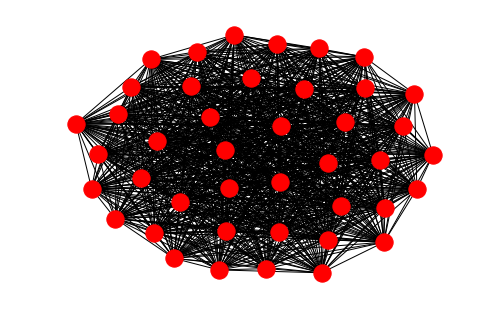

In [14]:
 %matplotlib inline
 nx.draw(friend_graph)